# Lab 1 Analysis Example using Thicket

In [239]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [240]:
tk = th.Thicket.from_caliperreader(glob("cali_files/sort3/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [241]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              96387453       154.066625   
                                                  226423909        9.534232   
                                                  236817265        3.307307   
                                                  366907904        1.398068   
                                                  369740256        9.755237   
                                                  478579561        3.327772   
                                                  485392475       10.151916   
                                                  491488988        0.308123   
                                                  534472231        1.486794   
                                                  561425512        1.363670   
                                                  577358404      549.972965   
                                                  591006971        8.675781   
                                                  689404126        1.158580   
                                                  866384639     2470.648388   
                                                  914308246        8.305610   
                                                  939046943        1.644635   
                                                  1058089730       0.526261   
                                                  1063817247       3.213429   
                                                  1127408257       0.375679   
                                                  1132568813       1.064485   
                                                  1229844398       2.431903   
                                                  1285908972      19.089650   
                                                  1342788810       0.700575   
                                                  1354911456       3.233499   
                                                  1360757312      26.832836   
                                                  1415354612      14.136684   
                                                  1467409442       1.489277   
                                                  1514005273       2.166577   
                                                  1571739899       7.963102   
                                                  1594575338      20.041720   
                                                  1618502310       3.193260   
                                                  1688383690       1.794932   
                                                  1701506829      26.845777   
                                                  1790927496       4.298378   
                                                  1798249285       3.408614   
                                                  1850520422       3.679455   
                                                  1898457644       1.388426   
                                                  1930022590       3.167180   
                                                  1941721610       4.945149   
                                                  1946102318      26.324211   
                                                  1946591664      53.510106   
                                                  1947014976    2371.954269   
                                                  1963771600       2.296861   
                                                  2200548846       3.016097   
                                                  2209562025       4.753515   
                                                  2243547470       1.184272   
                                                  2307843172       5.179713   
                                                  2338225906       1.129963   
                                                  2353328152       7.682396   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [198]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv
│  │  ├─ 1.000 MPI_Scatter
│  │  └─ 1.000 MPI_Send
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Bcast
│     ├─ 1.000 MPI_Gather
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [199]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
27870472             2.11.0-dev             512   
47336685             2.11.0-dev              16   
47349995             2.11.0-dev              32   
48844705             2.11.0-dev             512   
112973988            2.11.0-dev             128   
133440747            2.11.0-dev            1024   
147533088            2.11.0-dev             512   
153181124            2.11.0-dev              32   
162177994            2.11.0-dev             128   
199746946            2.11.0-dev               8   
246214965            2.11.0-dev             512   
264455869            2.11.0-dev              64   
331780099            2.11.0-dev             512   
340786940            2.11.0-dev              16   
341218275            2.11.0-dev             256   
342176260            2.11.0-dev              32   
352749751            2.11.0-dev              64   
353694380            2.11.0-dev             512   
361584300            2.11.0-dev             128   
409130334            2.11.0-dev               2   
455670205            2.11.0-dev              64   
478380754            2.11.0-dev              32   
500480455            2.11.0-dev             256   
520770882            2.11.0-dev              64   
521436951            2.11.0-dev              64   
528520268            2.11.0-dev              64   
543825812            2.11.0-dev              64   
544925369            2.11.0-dev               2   
548212958            2.11.0-dev              32   
610086156            2.11.0-dev             128   
610176732            2.11.0-dev             256   
630029934            2.11.0-dev            1024   
653311157            2.11.0-dev              16   
681821339            2.11.0-dev             512   
707336834            2.11.0-dev               8   
711667792            2.11.0-dev            1024   
824490133            2.11.0-dev             128   
862429449            2.11.0-dev               4   
881410611            2.11.0-dev               2   
891846577            2.11.0-dev               2   
916639650            2.11.0-dev               4   
916864386            2.11.0-dev             128   
942006610            2.11.0-dev              64   
957597401            2.11.0-dev              32   
964496916            2.11.0-dev               4   
966775440            2.11.0-dev               2   
1015993060           2.11.0-dev             512   
1026471878           2.11.0-dev            1024   
1071965932           2.11.0-dev               2   
1111433056           2.11.0-dev              64   
1115206163           2.11.0-dev             256   
1118429824           2.11.0-dev              64   
1138755284           2.11.0-dev              16   
1157827669           2.11.0-dev             512   
1160808634           2.11.0-dev            1024   
1171743201           2.11.0-dev               8   
1218193598           2.11.0-dev               2   
1220253797           2.11.0-dev               8   
1251537983           2.11.0-dev            1024   
1251577957           2.11.0-dev              64   
1272774332           2.11.0-dev               8   
1276743869           2.11.0-dev            1024   
1283284315           2.11.0-dev             128   
1327162941           2.11.0-dev            1024   
1341929903           2.11.0-dev            1024   
1349941363           2.11.0-dev             256   
1359835518           2.11.0-dev            1024   
1371405132           2.11.0-dev               2   
1390697016           2.11.0-dev               4   
1399701899           2.11.0-dev               4   
1411572590           2.11.0-dev              32   
1430042716           2.11.0-dev            1024   
1470328038           2.11.0-dev              64   
1479733613           2.11.0-dev               4   
1494702664           2.11.0-dev             512   
1495703692           2.11.0-dev               8   
1502164658           2.11.0-dev  

In [200]:
gb = tk.groupby("InputSize")
print(gb.keys())
allthickets = list(gb.values())
input65536 = gb[65536].groupby("Algorithm")
input262144 = gb[262144].groupby("Algorithm")
input1048576 = gb[1048576].groupby("Algorithm")
input4194304 = gb[4194304].groupby("Algorithm")
input16777216 = gb[16777216].groupby("Algorithm")
input67108864 = gb[67108864].groupby("Algorithm")
input268435456 = gb[268435456].groupby("Algorithm")


8  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b7e17136310>, 262144: <thicket.thicket.Thicket object at 0x2b7e177fef70>, 1048576: <thicket.thicket.Thicket object at 0x2b7e177f8d60>, 4194304: <thicket.thicket.Thicket object at 0x2b7e16cc2f70>, 16777216: <thicket.thicket.Thicket object at 0x2b7e17ddd580>, 67108864: <thicket.thicket.Thicket object at 0x2b7e17dddbe0>, 167772216: <thicket.thicket.Thicket object at 0x2b7e16bd6430>, 268435456: <thicket.thicket.Thicket object at 0x2b7e17a93850>}
dict_keys([65536, 262144, 1048576, 4194304, 16777216, 67108864, 167772216, 268435456])
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b7e16ea7eb0>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b7e17ded580>, 'Sample Sort': <thicket.thicket.Thicket object at 0x2b7e17bec580>}
3  thickets created...
{'Bubble Sort(Odd/Even)': <thicket.thicket.Thicket object at 0x2b7e17030a60>, 'MergeSort': <thicket.thicket.Thicket object at 0x2b7e17f58b50>,

Compose these 3 groups column-wise to get a holistic view of the data

In [201]:
ctk65536 = th.Thicket.concat_thickets(
    thickets=list(input65536.values()),
    headers=list(input65536.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk262144 = th.Thicket.concat_thickets(
    thickets=list(input262144.values()),
    headers=list(input262144.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk1048576 = th.Thicket.concat_thickets(
    thickets=list(input1048576.values()),
    headers=list(input1048576.keys()),
    axis="columns",
    metadata_key="num_procs"
)

ctk4194304 = th.Thicket.concat_thickets(
    thickets=list(input4194304.values()),
    headers=list(input4194304.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk16777216 = th.Thicket.concat_thickets(
    thickets=list(input16777216.values()),
    headers=list(input16777216.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk67108864 = th.Thicket.concat_thickets(
    thickets=list(input67108864.values()),
    headers=list(input67108864.keys()),
    axis="columns",
    metadata_key="num_procs"
)
ctk268435456 = th.Thicket.concat_thickets(
    thickets=list(input268435456.values()),
    headers=list(input268435456.keys()),
    axis="columns",
    metadata_key="num_procs"
)



allctk = []
allctk.append(ctk65536)
allctk.append(ctk262144)
allctk.append(ctk1048576)
allctk.append(ctk4194304)
allctk.append(ctk16777216)
allctk.append(ctk67108864)
allctk.append(ctk268435456)

In [202]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.001669   
                                                  4                      0.009862   
                                                  8                      0.070013   
                                                  16                     0.013567   
                                                  32                     0.017316   
                                                  64                     0.607166   
                                                  128                    2.321344   
                                                  256                    5.164360   
                                                  512                    0.679221   
                                                  1024                   2.625594   
{'name': 'comm', 'type': 'function'}              2                      0.000697   
                                                  4                      0.008726   
                                                  8                      0.049288   
                                                  16                     0.012083   
                                                  32                     0.015669   
                                                  64                     0.590661   
                                                  128                    2.279356   
                                                  256                    5.122629   
                                                  512                    0.660691   
                                                  1024                   2.582861   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.004282   
                                                  4                      0.011924   
                                                  8                      0.078054   
                                                  16                     0.044404   
                                                  32                     0.024514   
                                                  64                     0.570346   
                                                  128                    1.997997   
                                                  256                    5.258444   
                                                  512                    0.802393   
                                                  1024                   2.703449   
{'name': 'comm', 'type': 'function'}              2                      0.000765   
                                                  4                      0.008998   
                                                  8                      0.055834   
                                                  16                     0.041194   
                                                  32                     0.020775   
                                                  64                     0.550683   
                                                  128                    1.953333   
                                                  256                    5.230117   
                                                  512                    0.783347   
                                                  1024                   2.659602   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.015861   
                                                  4                      0.025625   
                                                  8                      0.083165   
                                                  16                     0.028230   
                                                  32                     0.292084   
                                                  64                     1.144371   
                                                  128                    2.578823   
                                                  256                    0.554140   
                                                  512                    0.899907   
                                                  1024                   2.948187   
{'name': 'comm', 'type': 'function'}              2                      0.002764   
                                                  4                      0.012933   
                                                  8                      0.071711   
                                                  16                     0.017649   
                                                  32                     0.262416   
                                                  64                     1.069521   
                                                  128                    2.525473   
                                                  256                    0.534270   
                                                  512                    0.873498   
                                                  1024                   2.893985   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.056925   
                                                  4                      0.080182   
                                                  8                      0.076999   
                                                  16                     0.069699   
                                                  32                     0.072596   
                                                  64                     0.070389   
                                                  128                    1.255984   
                                                  256                    4.638044   
                                                  512                   10.316530   
                                                  1024                   1.865128   
{'name': 'comm', 'type': 'function'}              2                      0.006602   
                                                  4                      0.025192   
                                                  8                      0.030807   
                                                  16                     0.039620   
                                                  32                     0.033240   
                                                  64                     0.031456   
                                                  128                    0.991721   
                                                  256                    4.506608   
                                                  512                   10.019768   
                                                  1024                   1.782231   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.224419   
                                                  4                      0.298790   
                                                  8                      0.595360   
                                                  16                     1.294479   
                                                  32                     2.564809   
                                                  64                     3.868689   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'comm', 'type': 'function'}              2                      0.023035   
                                                  4                      0.078119   
                                                  8                      0.202731   
                                                  16                     0.575165   
                                                  32                     1.168811   
                                                  64                     2.001097   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      0.893507   
                                                  4                      1.141405   
                                                  8                      2.256454   
                                                  16                     4.403630   
                                                  32                     9.126755   
                                                  64                    15.518905   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'comm', 'type': 'function'}              2                      0.090032   
                                                  4                      0.257947   
                                                  8                      0.772668   
                                                  16                     1.719551   
                                                  32                     3.911038   
                                                  64                     6.704726   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Bubble Sort(Odd/Even)  \
                                                                    Min time/rank   
node                                              num_procs                         
{'name': 'main', 'type': 'function'}              2                      3.588849   
                                                  4                      4.551473   
                                                  8                      8.694964   
                                                  16                    17.140277   
                                                  32                    33.607990   
                                                  64                    65.925327   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'comm', 'type': 'function'}              2                      0.370215   
                                                  4                      1.048927   
                                                  8                      2.873536   
                                                  16                     6.684301   
                                                  32                    13.565610   
                                                  64                    27.669022   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'comm_large', 'type': 'function'}        2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Recv', 'type': 'function'}          2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32                          NaN   
                                                  64                          NaN   
                                                  128                         NaN   
                                                  256                         NaN   
                                                  512                         NaN   
                                                  1024                        NaN   
{'name': 'MPI_Scatter', 'type': 'function'}       2                           NaN   
                                                  4                           NaN   
                                                  8                           NaN   
                                                  16                          NaN   
                                                  32             

Perform pandas operations to get the table in a desirable format for plotting

In [203]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [204]:
for ctk in allctk:
    display(ctk.dataframe)

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.001669      0.001697      0.001683   
                  4                      0.009862      0.012919      0.010884   
                  8                      0.070013      0.105886      0.095929   
                  16                     0.013567      0.018901      0.016282   
                  32                     0.017316      0.028895      0.023536   
                  64                     0.607166      0.698265      0.652058   
                  128                    2.321344      2.565817      2.437002   
                  256                    5.164360     40.106911     35.554745   
                  512                    0.679221     34.606893     30.104560   
                  1024                   2.625594      6.407683      5.278004   
comm              2                      0.000697      0.000995      0.000846   
                  4                      0.008726      0.011703      0.009795   
                  8                      0.049288      0.100902      0.082573   
                  16                     0.012083      0.017712      0.014927   
                  32                     0.015669      0.027264      0.021875   
                  64                     0.590661      0.675759      0.638959   
                  128                    2.279356      2.552269      2.413414   
                  256                    5.122629     40.053201     35.518836   
                  512                    0.660691     34.588756     30.085554   
                  1024                   2.582861      6.378198      5.237304   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.004282      0.004287      0.004285   
                  4                      0.011924      0.012679      0.012261   
                  8                      0.078054      0.117313      0.096778   
                  16                     0.044404      0.049128      0.046781   
                  32                     0.024514      0.045326      0.035496   
                  64                     0.570346      0.708544      0.647886   
                  128                    1.997997      2.265097      2.139591   
                  256                    5.258444      5.606580      5.425991   
                  512                    0.802393      1.328513      1.047968   
                  1024                   2.703449      4.013888      3.279880   
comm              2                      0.000765      0.001959      0.001362   
                  4                      0.008998      0.009415      0.009198   
                  8                      0.055834      0.103844      0.078810   
                  16                     0.041194      0.045346      0.043714   
                  32                     0.020775      0.040472      0.032023   
                  64                     0.550683      0.703143      0.631594   
                  128                    1.953333      2.250122      2.114735   
                  256                    5.230117      5.582657      5.392349   
                  512                    0.783347      1.307744      1.026645   
                  1024                   2.659602      3.973956      3.237409   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.015861      0.015900      0.015881   
                  4                      0.025625      0.029243      0.026919   
                  8                      0.083165      0.128417      0.109066   
                  16                     0.028230      0.179000      0.121592   
                  32                     0.292084      0.358748      0.326018   
                  64                     1.144371      1.251195      1.190830   
                  128                    2.578823      2.796295      2.674346   
                  256                    0.554140      1.020282      0.720601   
                  512                    0.899907      1.462152      1.164611   
                  1024                   2.948187      4.377997      3.747467   
comm              2                      0.002764      0.006918      0.004841   
                  4                      0.012933      0.020015      0.015438   
                  8                      0.071711      0.104827      0.087098   
                  16                     0.017649      0.168708      0.111279   
                  32                     0.262416      0.348324      0.305833   
                  64                     1.069521      1.220279      1.151474   
                  128                    2.525473      2.748768      2.635264   
                  256                    0.534270      0.994116      0.698469   
                  512                    0.873498      1.432522      1.133644   
                  1024                   2.893985      4.328706      3.693966   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.056925      0.056953      0.056939   
                  4                      0.080182      0.083537      0.082690   
                  8                      0.076999      0.084011      0.081604   
                  16                     0.069699      0.129821      0.096055   
                  32                     0.072596      0.126288      0.096084   
                  64                     0.070389      0.123311      0.096832   
                  128                    1.255984      1.339264      1.292396   
                  256                    4.638044      5.118942      4.847202   
                  512                   10.316530     10.831695     10.530281   
                  1024                   1.865128      2.351034      2.107791   
comm              2                      0.006602      0.024389      0.015495   
                  4                      0.025192      0.047865      0.037989   
                  8                      0.030807      0.056484      0.041469   
                  16                     0.039620      0.089924      0.057090   
                  32                     0.033240      0.086880      0.057182   
                  64                     0.031456      0.097391      0.057501   
                  128                    0.991721      1.279680      1.236166   
                  256                    4.506608      5.058435      4.776365   
                  512                   10.019768     10.757523     10.451847   
                  1024                   1.782231      2.263185      2.027943   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.224419      0.224724      0.224572   
                  4                      0.298790      0.303664      0.300991   
                  8                      0.595360      0.651737      0.619231   
                  16                     1.294479      1.355790      1.324049   
                  32                     2.564809      2.668528      2.610729   
                  64                     3.868689      3.997776      3.919742   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
comm              2                      0.023035      0.096847      0.059941   
                  4                      0.078119      0.160804      0.122705   
                  8                      0.202731      0.359903      0.305377   
                  16                     0.575165      0.938687      0.709594   
                  32                     1.168811      2.059903      1.538524   
                  64                     2.001097      3.471515      2.653428   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      0.893507      0.893918      0.893712   
                  4                      1.141405      1.144665      1.143831   
                  8                      2.256454      2.286138      2.276545   
                  16                     4.403630      4.472347      4.431297   
                  32                     9.126755      9.419250      9.288184   
                  64                    15.518905     16.150878     15.689170   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
comm              2                      0.090032      0.383651      0.236842   
                  4                      0.257947      0.575367      0.432585   
                  8                      0.772668      1.378597      1.009242   
                  16                     1.719551      2.995372      2.050051   
                  32                     3.911038      6.593198      4.405242   
                  64                     6.704726     11.019171      7.352042   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

Bubble Sort(Odd/Even)                              \
                                    Min time/rank Max time/rank Avg time/rank   
name              num_procs                                                     
main              2                      3.588849      3.589807      3.589328   
                  4                      4.551473      4.561324      4.558743   
                  8                      8.694964      8.727356      8.709558   
                  16                    17.140277     17.241857     17.196249   
                  32                    33.607990     33.805059     33.715293   
                  64                    65.925327     66.325380     66.214683   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
comm              2                      0.370215      1.558571      0.964393   
                  4                      1.048927      2.261688      1.717952   
                  8                      2.873536      5.211591      3.690170   
                  16                     6.684301     11.329986      7.543202   
                  32                    13.565610     23.145458     14.680227   
                  64                    27.669022     46.180393     28.876876   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
comm_large        2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Recv          2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN           NaN           NaN   
                  256                         NaN           NaN           NaN   
                  512                         NaN           NaN           NaN   
                  1024                        NaN           NaN           NaN   
MPI_Scatter       2                           NaN           NaN           NaN   
                  4                           NaN           NaN           NaN   
                  8                           NaN           NaN           NaN   
                  16                          NaN           NaN           NaN   
                  32                          NaN           NaN           NaN   
                  64                          NaN           NaN           NaN   
                  128                         NaN          

In [205]:
# Define common variables
threads = sorted(list(set(allctk[0].dataframe.index.get_level_values("num_procs"))))

In [206]:
# Drop unwanted columns
for ctk in allctk:
    columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())


In [207]:
for ctk in allctk:
    display(ctk.metadata)

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                        \
          spot:node.order               spot:output spot:time.variance   
num_procs                                                                
2                    true     65536-2-0-bubble.cali               true   
4                    true     65536-4-0-bubble.cali               true   
8                    true     65536-8-0-bubble.cali               true   
16                   true    65536-16-0-bubble.cali               true   
32                   true    65536-32-0-bubble.cali               true   
64                   true    65536-64-0-bubble.cali               true   
128                  true   65536-128-0-bubble.cali               true   
256                  true   65536-256-0-bubble.cali               true   
512                  true   65536-512-0-bubble.cali               true   
1024                 tru

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true     262144-2-0-bubble.cali               true   
4                    true     262144-4-0-bubble.cali               true   
8                    true     262144-8-0-bubble.cali               true   
16                   true    262144-16-0-bubble.cali               true   
32                   true    262144-32-0-bubble.cali               true   
64                   true    262144-64-0-bubble.cali               true   
128                  true   262144-128-0-bubble.cali               true   
256                  true   262144-256-0-bubble.cali               true   
512                  true   262144-512-0-bubble.cali               true   
1024        

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     1048576-2-0-bubble.cali               true   
4                    true     1048576-4-0-bubble.cali               true   
8                    true     1048576-8-0-bubble.cali               true   
16                   true    1048576-16-0-bubble.cali               true   
32                   true    1048576-32-0-bubble.cali               true   
64                   true    1048576-64-0-bubble.cali               true   
128                  true   1048576-128-0-bubble.cali               true   
256                  true   1048576-256-0-bubble.cali               true   
512                  true   1048576-512-0-bubble.cali               true   


Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev              2   
4                    2.11.0-dev              4   
8                    2.11.0-dev              8   
16                   2.11.0-dev             16   
32                   2.11.0-dev             32   
64                   2.11.0-dev             64   
128                  2.11.0-dev            128   
256                  2.11.0-dev            256   
512                  2.11.0-dev            512   
1024                 2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   
256        min#inclusive#sum#time.duration,max#inclusive#...   
512        min#inclusive#sum#time.duration,max#inclusive#...   
1024       min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   
256                                                 2   
512                                                 2   
1024                                                2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   
256        time.variance,node.order  regionprofile         spot   
512        time.variance,node.order  regionprofile         spot   
1024       time.variance,node.order  regionprofile         spot   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true     4194304-2-0-bubble.cali               true   
4                    true     4194304-4-0-bubble.cali               true   
8                    true     4194304-8-0-bubble.cali               true   
16                   true    4194304-16-0-bubble.cali               true   
32                   true    4194304-32-0-bubble.cali               true   
64                   true    4194304-64-0-bubble.cali               true   
128                  true   4194304-128-0-bubble.cali               true   
256                  true   4194304-256-0-bubble.cali               true   
512                  true   4194304-512-0-bubble.cali               true   


Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev            2.0   
4                    2.11.0-dev            4.0   
8                    2.11.0-dev            8.0   
16                   2.11.0-dev           16.0   
32                   2.11.0-dev           32.0   
64                   2.11.0-dev           64.0   
128                         NaN            NaN   
256                         NaN            NaN   
512                         NaN            NaN   
1024                        NaN            NaN   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128                                                      NaN   
256                                                      NaN   
512                                                      NaN   
1024                                                     NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                 2.0   
4                                                 2.0   
8                                                 2.0   
16                                                2.0   
32                                                2.0   
64                                                2.0   
128                           NaN                 NaN   
256                           NaN                 NaN   
512                           NaN                 NaN   
1024                          NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128                             NaN            NaN          NaN   
256                             NaN            NaN          NaN   
512                             NaN            NaN          NaN   
1024                            NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true   16777216-2-0-bubble.cali               true   
4                    true   16777216-4-0-bubble.cali               true   
8                    true   16777216-8-0-bubble.cali               true   
16                   true  16777216-16-0-bubble.cali               true   
32                   true  16777216-32-0-bubble.cali               true   
64                   true  16777216-64-0-bubble.cali               true   
128                   NaN                        NaN                NaN   
256                   NaN                        NaN                NaN   
512                   NaN                        NaN                NaN   
1024        

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev            2.0   
4                    2.11.0-dev            4.0   
8                    2.11.0-dev            8.0   
16                   2.11.0-dev           16.0   
32                   2.11.0-dev           32.0   
64                   2.11.0-dev           64.0   
128                         NaN            NaN   
256                         NaN            NaN   
512                         NaN            NaN   
1024                        NaN            NaN   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128                                                      NaN   
256                                                      NaN   
512                                                      NaN   
1024                                                     NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                 2.0   
4                                                 2.0   
8                                                 2.0   
16                                                2.0   
32                                                2.0   
64                                                2.0   
128                           NaN                 NaN   
256                           NaN                 NaN   
512                           NaN                 NaN   
1024                          NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128                             NaN            NaN          NaN   
256                             NaN            NaN          NaN   
512                             NaN            NaN          NaN   
1024                            NaN            NaN          NaN   

                                                                         \
          spot:node.order                spot:output spot:time.variance   
num_procs                                                                 
2                    true   67108864-2-0-bubble.cali               true   
4                    true   67108864-4-0-bubble.cali               true   
8                    true   67108864-8-0-bubble.cali               true   
16                   true  67108864-16-0-bubble.cali               true   
32                   true  67108864-32-0-bubble.cali               true   
64                   true  67108864-64-0-bubble.cali               true   
128                   NaN                        NaN                NaN   
256                   NaN                        NaN                NaN   
512                   NaN                        NaN                NaN   
1024        

Bubble Sort(Odd/Even)                 \
           cali.caliper.version mpi.world.size   
num_procs                                        
2                    2.11.0-dev            2.0   
4                    2.11.0-dev            4.0   
8                    2.11.0-dev            8.0   
16                   2.11.0-dev           16.0   
32                   2.11.0-dev           32.0   
64                   2.11.0-dev           64.0   
128                         NaN            NaN   
256                         NaN            NaN   
512                         NaN            NaN   
1024                        NaN            NaN   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128                                                      NaN   
256                                                      NaN   
512                                                      NaN   
1024                                                     NaN   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                 2.0   
4                                                 2.0   
8                                                 2.0   
16                                                2.0   
32                                                2.0   
64                                                2.0   
128                           NaN                 NaN   
256                           NaN                 NaN   
512                           NaN                 NaN   
1024                          NaN                 NaN   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128                             NaN            NaN          NaN   
256                             NaN            NaN          NaN   
512                             NaN            NaN          NaN   
1024                            NaN            NaN          NaN   

                                                                          \
          spot:node.order                 spot:output spot:time.variance   
num_procs                                                                  
2                    true   268435456-2-0-bubble.cali               true   
4                    true   268435456-4-0-bubble.cali               true   
8                    true   268435456-8-0-bubble.cali               true   
16                   true  268435456-16-0-bubble.cali               true   
32                   true  268435456-32-0-bubble.cali               true   
64                   true  268435456-64-0-bubble.cali               true   
128                   NaN                         NaN                NaN   
256                   NaN                         NaN                NaN   
512                   NaN                         NaN                NaN   


# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [208]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [215]:
def plot_mpl2(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [216]:
temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

print(temp[0])
print(ctk.dataframe.columns)

('Bubble Sort(Odd/Even)', 'Avg time/rank')
MultiIndex([('Bubble Sort(Odd/Even)',      'Avg time/rank'),
            (            'MergeSort',      'Min time/rank'),
            (            'MergeSort',      'Max time/rank'),
            (            'MergeSort',      'Avg time/rank'),
            (            'MergeSort', 'Variance time/rank'),
            (          'Sample Sort',      'Avg time/rank')],
           )


In [217]:
regions = sorted(list(set(ctk.dataframe.index.get_level_values("name"))))
print(regions)

['MPI_Bcast', 'MPI_Gather', 'MPI_Recv', 'MPI_Scatter', 'MPI_Send', 'comm', 'comm_large', 'comm_small', 'comp', 'comp_large', 'comp_small', 'correctness_check', 'data_init', 'main']


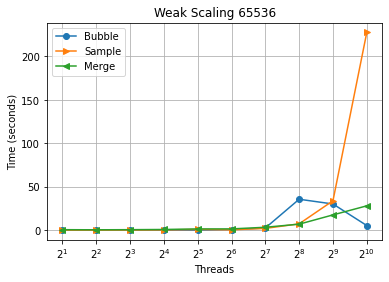

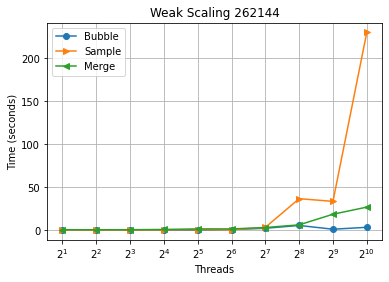

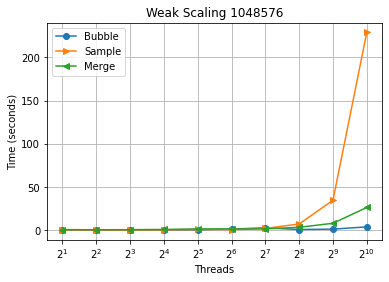

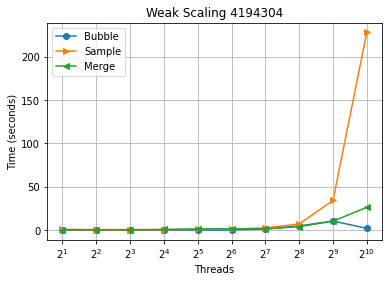

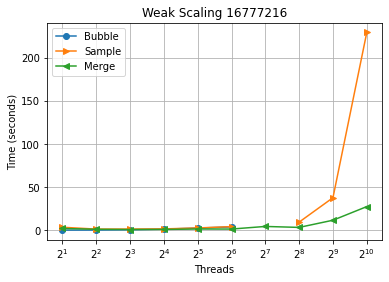

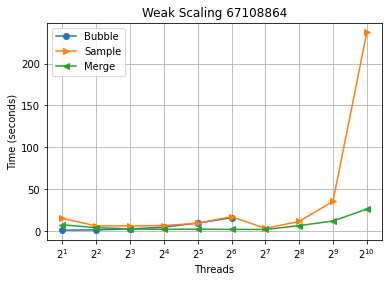

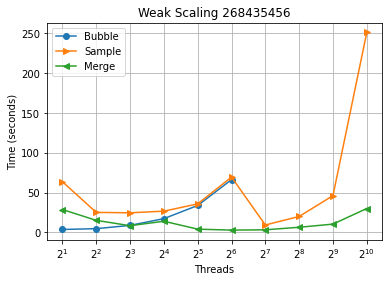

In [218]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        df2= ctk.dataframe[[temp[2]]].loc["main"],
        title=f"Weak Scaling {sizes[i]}",
        xlabel="Threads",
        ylabel="Time (seconds)",
        label1='Bubble',
        label2='Sample',
        label3='Merge'
    )
    i += 1

## Speedup